## Chapter 16 Cluster Analysis

**Original Code Credit:**: Shmueli, Galit; Bruce, Peter C.; Gedeck, Peter; Patel, Nitin R.. Machine Learning for Business Analytics Wiley.

*Modifications* have been made from the original textbook examples due to version changes in library dependencies and/or for clarity.

### Import Libraries

In [1]:
import os
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
import matplotlib.pylab as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

# Set the number of threads to avoid kmeans thread warning
os.environ['OMP_NUM_THREADS'] = '1'

### 16.1 Introduction

#### Example: Public Utilities

In [2]:
utilities_df = pd.read_csv(os.path.join('..', 'data', 'Utilities.csv'))
# set row names to the utilities column
utilities_df.set_index('Company', inplace=True)
# while not required, the conversion of integer data to float
# will avoid a warning when applying the scale function
utilities_df = utilities_df.apply(lambda x: x.astype('float64'))
# compute Euclidean distance
d = pairwise.pairwise_distances(utilities_df, metric='euclidean')
pd.DataFrame(d, columns=utilities_df.index, index=utilities_df.index)

Company,Arizona,Boston,Central,Commonwealth,NY,Florida,Hawaiian,Idaho,Kentucky,Madison,...,Northern,Oklahoma,Pacific,Puget,San Diego,Southern,Texas,Wisconsin,United,Virginia
Company,,,,,,,,,,,,,,,,,,,,,
Arizona,0.000000,3989.408076,140.402855,2654.277632,5777.167672,2050.529440,1435.265019,4006.104187,671.276346,2622.699002,...,1899.279821,598.556633,2609.045363,6914.742065,3363.061626,1063.009074,4430.251585,1790.485648,2427.588875,1016.617691
Boston,3989.408076,0.000000,4125.044132,1335.466502,1788.068027,6039.689076,2554.287162,7994.155985,3318.276558,1367.090634,...,2091.160485,4586.302564,1380.749962,10903.146464,629.760748,5052.331669,8419.610541,2199.721665,1562.210811,5005.081262
Central,140.402855,4125.044132,0.000000,2789.759674,5912.552908,1915.155154,1571.295401,3872.257626,807.920792,2758.559663,...,2035.441520,461.341670,2744.502847,6780.430307,3498.113013,928.749249,4295.014690,1925.772564,2563.637362,883.535455
Commonwealth,2654.277632,1335.466502,2789.759674,0.000000,3123.153215,4704.363099,1219.560005,6659.534567,1983.314354,43.648894,...,756.831954,3250.984589,56.644626,9568.434429,710.292965,3717.202963,7084.372839,864.273153,232.476871,3670.018191
NY,5777.167672,1788.068027,5912.552908,3123.153215,0.000000,7827.429211,4342.093798,9782.158178,5106.094153,3155.095594,...,3879.167462,6373.743249,3168.177463,12691.155108,2414.698757,6840.150291,10207.392630,3987.335962,3350.073118,6793.035300
Florida,2050.529440,6039.689076,1915.155154,4704.363099,7827.429211,0.000000,3485.671562,1959.731080,2721.706296,4672.829286,...,3949.092316,1454.292604,4659.356262,4866.111649,5413.093004,988.044559,2380.124974,3840.227943,4478.028874,1035.981475
Hawaiian,1435.265019,2554.287162,1571.295401,1219.560005,4342.093798,3485.671562,0.000000,5440.461781,764.083188,1187.941143,...,466.559118,2032.614245,1174.075616,8349.366438,1928.441480,2498.149024,5865.447190,358.476293,992.453252,2451.185161
Idaho,4006.104187,7994.155985,3872.257626,6659.534567,9782.158178,1959.731080,5440.461781,0.000000,4676.638384,6627.291780,...,5903.395450,3412.263965,6614.499239,2909.014679,7368.815437,2943.535570,447.828673,5795.958815,6432.132202,2989.963982
Kentucky,671.276346,3318.276558,807.920792,1983.314354,5106.094153,2721.706296,764.083188,4676.638384,0.000000,1951.628580,...,1228.436327,1269.102099,1938.026557,7585.467294,2692.212361,1734.103297,5101.414140,1119.940014,1756.378966,1687.236030


In [3]:
# pandas uses sample standard deviation
utilities_df_norm = (utilities_df - utilities_df.mean())/utilities_df.std()
# compute normalized distance based on Sales and Fuel Cost
utilities_df_norm[['Sales', 'Fuel_Cost']]
d_norm = pairwise.pairwise_distances(utilities_df_norm[['Sales', 'Fuel_Cost']],
                                     metric='euclidean')
pd.DataFrame(d_norm, columns=utilities_df.index, index=utilities_df.index)

Company,Arizona,Boston,Central,Commonwealth,NY,Florida,Hawaiian,Idaho,Kentucky,Madison,...,Northern,Oklahoma,Pacific,Puget,San Diego,Southern,Texas,Wisconsin,United,Virginia
Company,,,,,,,,,,,,,,,,,,,,,
Arizona,1.490116e-08,2.010329,0.774179,0.758738,3.021907,1.244422,1.885248,1.265638e+00,0.461292,0.738650,...,0.564657,0.182648,1.570780,1.947668,2.509043,0.913621,1.247976,5.214913e-01,2.761745e+00,1.252350
Boston,2.010329e+00,0.000000,1.465703,1.582821,1.013370,1.792397,0.740283,3.176654e+00,1.557738,1.719632,...,1.940166,2.166078,0.478334,3.501390,0.679634,1.634425,2.890560,1.654255e+00,1.100595e+00,1.479261
Central,7.741795e-01,1.465703,0.000000,1.015710,2.432528,0.631892,1.156092,1.732777e+00,0.419254,1.102287,...,1.113433,0.855093,0.987772,2.065643,1.836762,0.276440,1.428159,8.389668e-01,2.034824e+00,0.510365
Commonwealth,7.587375e-01,1.582821,1.015710,0.000000,2.571969,1.643857,1.746027,2.003230e+00,0.629994,0.138758,...,0.377004,0.937389,1.258835,2.699060,2.202930,1.278514,1.998818,2.434079e-01,2.547116e+00,1.502093
NY,3.021907e+00,1.013370,2.432528,2.571969,0.000000,2.635573,1.411695,4.162561e+00,2.566439,2.705445,...,2.938637,3.174588,1.462019,4.397433,0.715629,2.558409,3.831132,2.661786e+00,9.525069e-01,2.328691
Florida,1.244422e+00,1.792397,0.631892,1.643857,2.635573,0.000000,1.228805,1.764123e+00,1.025663,1.722510,...,1.698624,1.243634,1.343185,1.767581,1.953423,0.366744,1.277920,1.452417e+00,2.016493e+00,0.313847
Hawaiian,1.885248e+00,0.740283,1.156092,1.746027,1.411695,1.228805,0.000000,2.860189e+00,1.436822,1.880361,...,2.027224,1.997036,0.560997,2.995848,0.726095,1.205034,2.463227,1.711256e+00,8.799342e-01,0.929414
Idaho,1.265638e+00,3.176654,1.732777,2.003230,4.162561,1.764123,2.860189,2.980232e-08,1.650417,1.950296,...,1.708409,1.083449,2.705579,0.992092,3.563727,1.658671,0.600089,1.778813e+00,3.720421e+00,1.980715
Kentucky,4.612918e-01,1.557738,0.419254,0.629994,2.566439,1.025663,1.436822,1.650417e+00,0.000000,0.697674,...,0.694524,0.608401,1.110854,2.180496,2.048098,0.658996,1.493274,4.267801e-01,2.308613e+00,0.929141


### 16.4 Hierarchical (Agglomerative) Clustering

**We will focus on kMeans Clustering but code examples for hierarchical clustering are provided for example purposes.**

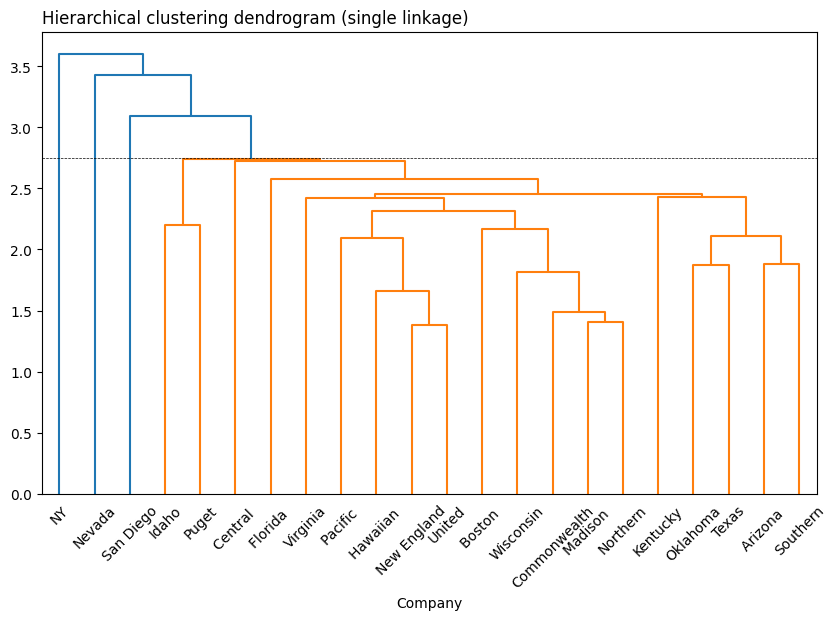

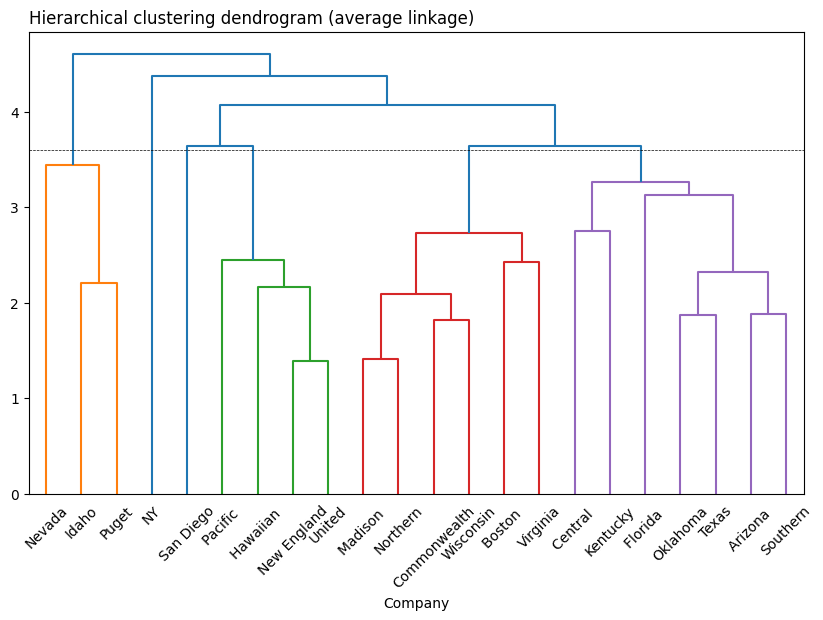

In [4]:
def plot_dendrogram(data, method, color_threshold):
     # in linkage() set argument method =
     # 'single', 'complete', 'average', 'weighted', centroid', 'median', 'ward'
     Z = linkage(data, method=method)
     fig, ax = plt.subplots(figsize=(10, 6))
     ax.set_title(f'Hierarchical clustering dendrogram ({method} linkage)', loc='left')
     ax.set_xlabel('Company')
     dendrogram(Z, labels=data.index, color_threshold=color_threshold, ax=ax)
     ax.axhline(y=color_threshold, color='black', linewidth=0.5, linestyle='dashed')
 
plot_dendrogram(utilities_df_norm, 'single', 2.75)
 
plot_dendrogram(utilities_df_norm, 'average', 3.6)

In [5]:
memb = fcluster(linkage(utilities_df_norm, method='single'), 6, criterion='maxclust')
memb = pd.Series(memb, index=utilities_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  Idaho, Puget
2 :  Arizona , Boston , Commonwealth, Florida , Hawaiian , Kentucky, Madison , New England, Northern, Oklahoma, Pacific , Southern, Texas, Wisconsin, United, Virginia
3 :  Central 
4 :  San Diego
5 :  Nevada
6 :  NY


In [6]:
memb = fcluster(linkage(utilities_df_norm, method='average'), 6, criterion='maxclust')
memb = pd.Series(memb, index=utilities_df_norm.index)
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

1 :  Idaho, Nevada, Puget
2 :  Hawaiian , New England, Pacific , United
3 :  San Diego
4 :  Boston , Commonwealth, Madison , Northern, Wisconsin, Virginia
5 :  Arizona , Central , Florida , Kentucky, Oklahoma, Southern, Texas
6 :  NY


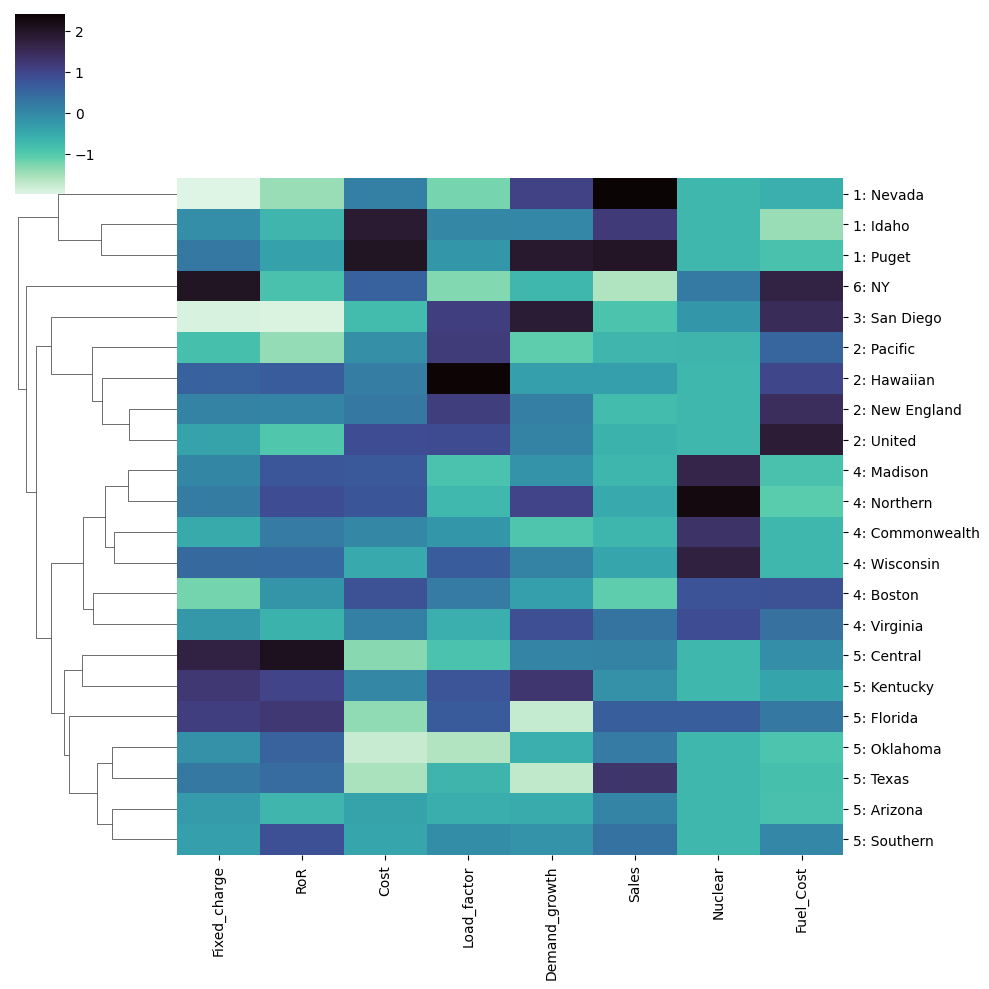

In [7]:
# set labels as cluster membership and utility name
utilities_df_norm.index = ['{}: {}'.format(cluster, state)
                           for cluster, state in zip(memb, utilities_df_norm.index)]
# plot heatmap
# the '_r' suffix reverses the color mapping to large = dark
sns.clustermap(utilities_df_norm, method='average', col_cluster=False, cmap='mako_r')
plt.show()

### 16.5 Non-Hierarchical Clustering: The k-Means Algorithm


In [8]:
# Normalize distances
utilities_df_norm = utilities_df.apply(preprocessing.scale, axis=0)
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(utilities_df_norm)
# Cluster membership
memb = pd.Series(kmeans.labels_, index=utilities_df_norm.index)
for key, item in memb.groupby(memb):
     print(key, ': ', ', '.join(item.index))

0 :  Idaho, Puget
1 :  Arizona , Central , Florida , Kentucky, Oklahoma, Southern, Texas
2 :  Commonwealth, Madison , Northern, Wisconsin, Virginia
3 :  Boston , Hawaiian , New England, Pacific , San Diego, United
4 :  Nevada
5 :  NY


In [9]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=utilities_df_norm.columns)
centroids

,Fixed_charge,RoR,Cost,Load_factor,Demand_growth,Sales,Nuclear,Fuel_Cost
0,0.088252,-0.541112,1.995766,-0.109502,0.987702,1.621068,-0.731447,-1.174696
1,0.516184,0.797896,-1.009097,-0.345490,-0.501098,0.360140,-0.535523,-0.420198
2,-0.011599,0.339180,0.224086,-0.366466,0.170386,-0.411331,1.601868,-0.609460
3,-0.632893,-0.639936,0.206692,1.175321,0.057691,-0.757719,-0.380962,1.203616
4,-2.019709,-1.476137,0.119723,-1.256665,1.069762,2.458495,-0.731447,-0.616086
5,2.085268,-0.883194,0.591840,-1.325495,-0.735555,-1.618644,0.219434,1.732470


In [10]:
# calculate the distances of each data point to the cluster centers
distances = kmeans.transform(utilities_df_norm)
# find closest cluster for each data point
minSquaredDistances = distances.min(axis=1) ** 2
# combine with cluster labels into a data frame
df = pd.DataFrame({'squaredDistance': minSquaredDistances, 'cluster': kmeans.labels_},
    index=utilities_df_norm.index)
# group by cluster and print information
for cluster, data in df.groupby('cluster'):
    count = len(data)
    withinClustSS = data.squaredDistance.sum()
    print(f'Cluster {cluster} ({count} members): {withinClustSS:.2f} within cluster ')


Cluster 0 (2 members): 2.54 within cluster 
Cluster 1 (7 members): 27.77 within cluster 
Cluster 2 (5 members): 10.66 within cluster 
Cluster 3 (6 members): 22.20 within cluster 
Cluster 4 (1 members): 0.00 within cluster 
Cluster 5 (1 members): 0.00 within cluster 


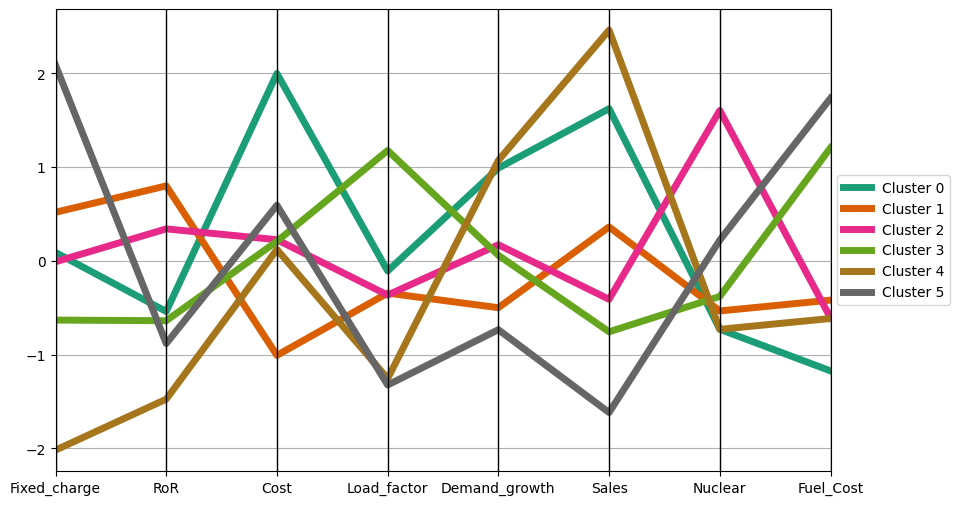

In [11]:
centroids['cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
plt.figure(figsize=(10,6))
parallel_coordinates(centroids, class_column='cluster', colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

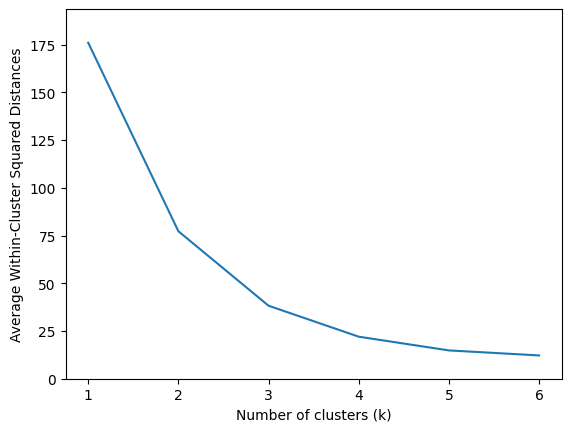

In [12]:
inertia = []
for n_clusters in range(1, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(utilities_df_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 7), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()